In [56]:
import pandas as pd
# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from joblib import dump
from joblib import load

In [3]:
X_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
X_cv = pd.read_csv('./X_cv.csv')
y_cv = pd.read_csv('./y_cv.csv')
X_test = pd.read_csv('./X_test.csv')
y_test = pd.read_csv('./y_test.csv')

AUC for number of estimators =  10 is 0.92864866414402
AUC for number of estimators =  50 is 0.9327082903336774
AUC for number of estimators =  100 is 0.9331428735236785
AUC for number of estimators =  500 is 0.9334461644306846
AUC for number of estimators =  1000 is 0.9335454649696137
AUC for number of estimators =  2000 is 0.9337424607269809
AUC for number of estimators =  3000 is 0.9338873982341476


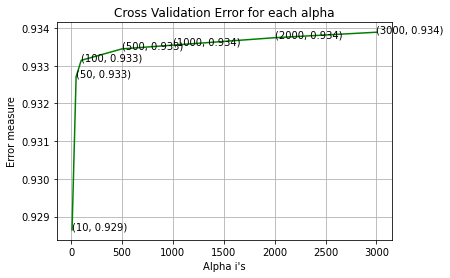

For values of best alpha =  3000 The train AUC is: 0.9999996244006397
For values of best alpha =  3000 The cross validation AUC is: 0.9338873982341476
For values of best alpha =  3000 The test AUC is: 0.9324435826176872


In [8]:
%matplotlib inline

# Random Forest Classifier

alpha=[10,50,100,500,1000,2000,3000]
aplha = [100]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

rfc=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
rfc.fit(X_train,y_train)
rfc_clf = CalibratedClassifierCV(rfc, method="sigmoid")
rfc_clf.fit(X_train, y_train)
    
predict_y = rfc_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = rfc_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

predict_y = rfc_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

In [53]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df = fi_df[:10]
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,10))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

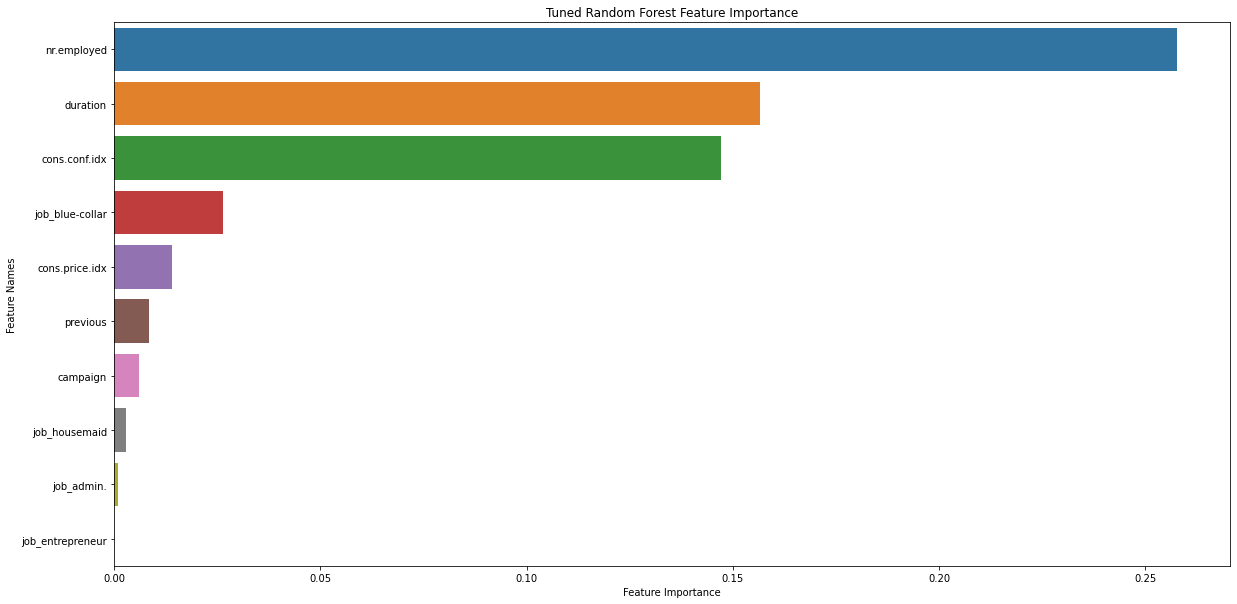

In [55]:
plot_feature_importance(xgb.feature_importances_,X_train.columns,'Tuned Random Forest')

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

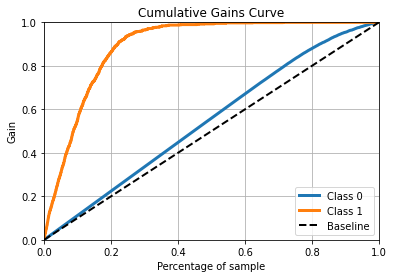

In [29]:
skplt.metrics.plot_cumulative_gain(y_test, predict_y)

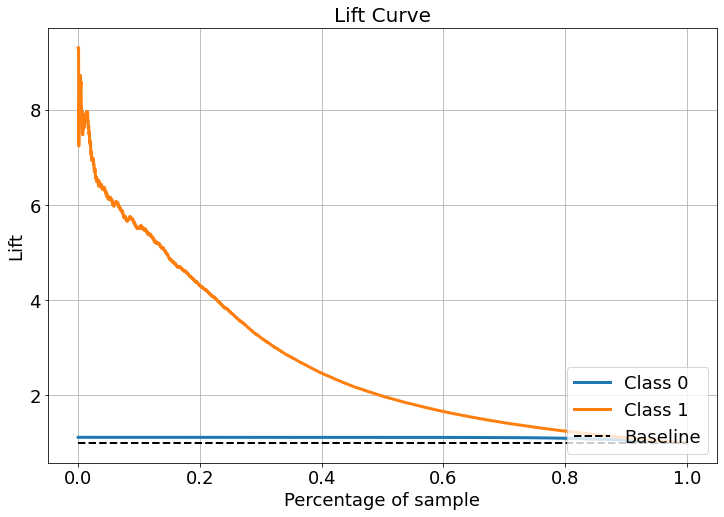

In [32]:
skplt.metrics.plot_lift_curve(
    y_test, predict_y, figsize=(12, 8), title_fontsize=20, text_fontsize=18
)
plt.show()

The gains curve looks pretty good, and it works much betetr than randomly calling customers.

The lift curve tells us that using the model can give you 4 to 5 times better results than randomly calling customers

[22:23:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

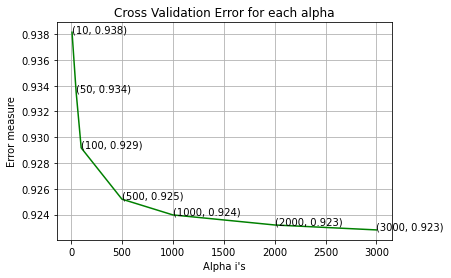

[22:40:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [28]:
%matplotlib inline

# XGB Classifier

#alpha=[10,50,100,500,1000,2000]
aplha = [10]
cv_auc_array=[]
for i in alpha:
    x_cfl=x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

xgb=XGBClassifier(n_estimators=i)
xgb.fit(X_train,y_train)
xgb_clf = CalibratedClassifierCV(xgb, method="sigmoid")
xgb_clf.fit(X_train, y_train)
    
predict_y = xgb_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = xgb_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = xgb_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))


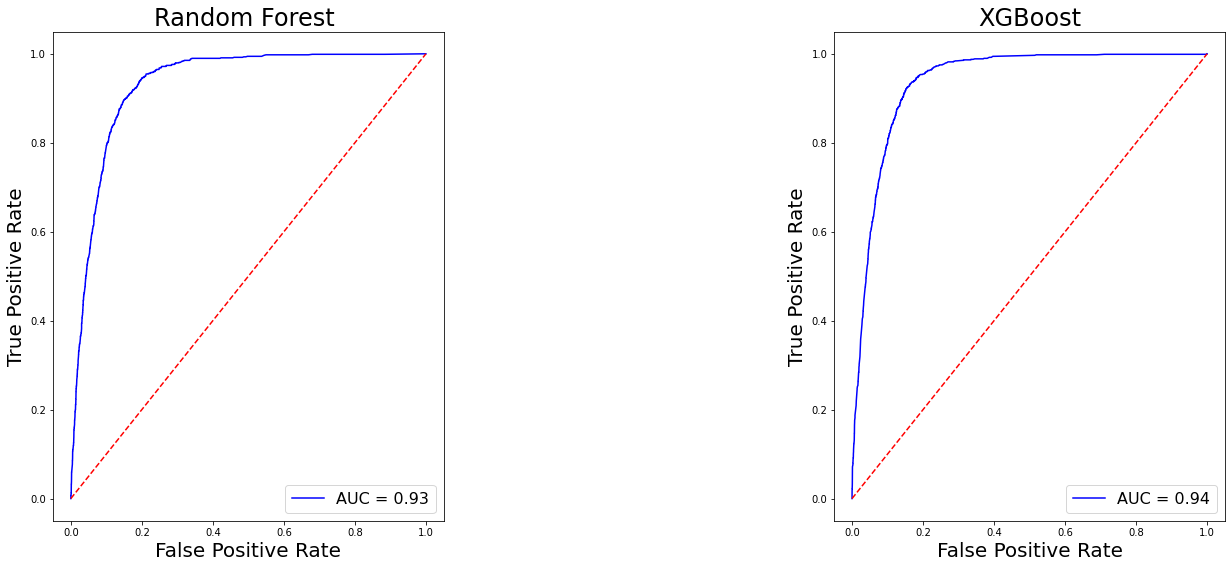

In [35]:
#ROC AUC graphs for the top 2 models with the best precision/recall scores

fig, ( ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (21,9))

#Random Forest
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

ax1.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Random Forest ',fontsize=24)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=20)
ax1.legend(loc = 'lower right', prop={'size': 16})

#XG Boost
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr_xgb, tpr_xgb, threshold_xgb = metrics.roc_curve(y_test, preds)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)

ax2.plot(fpr_xgb, tpr_xgb, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('XGBoost',fontsize=24)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_xlabel('False Positive Rate',fontsize=20)
ax2.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)


In [36]:
from treeinterpreter import treeinterpreter as ti

prediction, bias, contributions = ti.predict(r_cfl, X_test)

In [37]:
for i,row in X_test[:10].iterrows():

    data_point = pd.DataFrame([row])
    data_point.set_axis(['value_variable']) # Once transposed, it will be the column name
    prediction, bias, contributions = ti.predict(r_cfl, data_point)
    local_interpretation = data_point.append(
        pd.DataFrame([[round(c[1],3) for c in contributions[0]]], columns=data_point.columns.tolist(), index=['contribution_variable'])
    ).T.sort_values('contribution_variable', ascending=False)

In [38]:
local_interpretation

,9,contribution_variable
poutcome_nonexistent,0.000000,0.034
contact_telephone,0.000000,0.022
default_unknown,0.000000,0.013
contact_cellular,1.000000,0.010
housing_no,0.000000,0.009
...,...,...
education_high.school,1.000000,-0.037
age_cat_adult,1.000000,-0.040
nr.employed,5099.100000,-0.040
poutcome_failure,1.000000,-0.043


In [40]:
test_pred = sig_clf.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7324
           1       0.57      0.50      0.53       881

    accuracy                           0.91      8205
   macro avg       0.75      0.73      0.74      8205
weighted avg       0.90      0.91      0.90      8205



I tried to implement the Tree Interpretor and looks like it's bad woth small daatset and computation is required ot run this for more insights.

## Save Model

Ideally this is the point to save the model and convert exisiting code into production

In [60]:
dump(xgb_clf, "xgb.joblib.dat")
print("Saved model to: xgb.joblib.dat")

Saved model to: xgb.joblib.dat


In [59]:
dump(rfc_clf, "rfc.joblib.dat")
print("Saved model to: rfc.joblib.dat")

Saved model to: rfc.joblib.dat
